In [111]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler

In [132]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [113]:
X_train.shape, y_train.shape, np.max(X_train)

((60000, 28, 28), (60000,), 255)

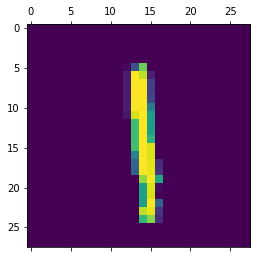

In [114]:
plt.matshow(X_train[8])

In [133]:
# X_train_flattened = X_train.reshape(len(X_train),28*28)
# scaler = MinMaxScaler() # better just divide by 255 as max=255 and min 0
X_train, X_test = X_train / 255, X_test / 255
# X_train_flattened_scaled=scaler.fit_transform(X_train_flattened)
# X_train_flattened_scaled.shape

In [116]:
# X_test_flattened = X_test.reshape(len(X_test),28*28)
# X_test_flattened_scaled=scaler.fit_transform(X_test_flattened)
# X_test_flattened_scaled.shape

In [119]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [121]:
model = keras.Sequential([
    keras.layers.Dense(85, input_shape=(784, ), activation='relu'),
    keras.layers.Dense(79, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(X_train_flattened_scaled, y_train, epochs=12)

Epoch 1/12
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4558 - accuracy: 0.8684
Epoch 2/12
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1263 - accuracy: 0.9622
Epoch 3/12
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0845 - accuracy: 0.9748
Epoch 4/12
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0619 - accuracy: 0.9809
Epoch 5/12
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0471 - accuracy: 0.9846
Epoch 6/12
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0413 - accuracy: 0.9877
Epoch 7/12
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0349 - accuracy: 0.9892
Epoch 8/12
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0290 - accuracy: 0.9898
Epoch 9/12
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0255 - accuracy: 0.9917
Epoch 10/12
1875/1875 [==============================] - 3s 2ms/step - loss: 0.019

In [137]:
model.evaluate(X_test_flattened_scaled, y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.0822 - accuracy: 0.9747


[0.08218829333782196, 0.9746999740600586]

In [131]:
y_predicted = model.predict(X_test_flattened_scaled)
print(y_predicted[0], y_test[0])
np.argmax(y_predicted[0])

[5.0124526e-04 9.8818111e-01 7.3268116e-03 9.9292195e-01 9.3672374e-05
 8.2123280e-04 2.3148395e-11 1.0000000e+00 5.1279101e-05 9.7414547e-01] 7


7

In [124]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
print(y_predicted_labels[:20], y_test[:20])

[7, 2, 1, 0, 4, 1, 4, 9, 6, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4] [7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]


Text(114.0, 0.5, 'True Values')

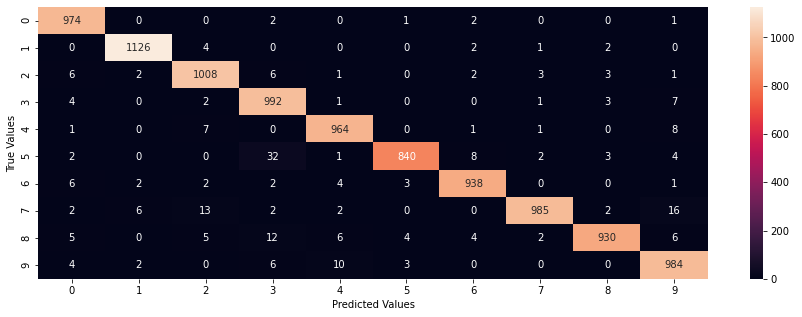

In [125]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)
import seaborn as sns
plt.figure(figsize=(15, 5))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel("Predicted Values")
plt.ylabel("True Values")

In [136]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(90, activation='relu'),
    keras.layers.Dense(80, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(X_train_flattened_scaled, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4381 - accuracy: 0.8742
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1162 - accuracy: 0.9636
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0791 - accuracy: 0.9760
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0596 - accuracy: 0.9813
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0473 - accuracy: 0.9845
